# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
# %pip install numpy
# %pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

The data was exported from [https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data) by performing:

```bash
wget 'https://data.cityofnewyork.us/resource/jb7j-dtam.json?$limit=2000'
```

Data Description: **New York City Leading Causes of Death**

The leading causes of death by sex and ethnicity in New York City in since 2007. Cause of death is derived from the NYC death certificate which is issued for every death that occurs in New York City.


In [3]:
df = pd.read_json('data/nyc_leading_causes_death.json')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

- Show 5 rows, selected at random, from the data set.


In [4]:
df.sample(5)

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
412,2011,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3222,241.6,206.1
550,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,4495,335.1,277
343,2012,Malignant Neoplasms (Cancer: C00-C97),F,Not Stated/Unknown,36,.,.
212,2013,All Other Causes,F,Other Race/ Ethnicity,39,.,.
317,2012,All Other Causes,M,White Non-Hispanic,2316,172.9,145.7


- Show each of the column names and their data types.

In [5]:
df.dtypes

year                        int64
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

- Show total number of rows and columns in the dataset.

In [6]:
num_rows, num_cols = df.shape
print("Total number of rows:", num_rows)
print("Total number of columns:", num_cols)

Total number of rows: 1094
Total number of columns: 7


- Show unique values in column `leading_cause`.

In [7]:
unique_leading_causes = df['leading_cause'].unique()
print(unique_leading_causes)

['Malignant Neoplasms (Cancer: C00-C97)'
 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)'
 "Alzheimer's Disease (G30)" 'Septicemia (A40-A41)'
 'Cerebrovascular Disease (Stroke: I60-I69)'
 'Influenza (Flu) and Pneumonia (J09-J18)' 'Diabetes Mellitus (E10-E14)'
 'Chronic Lower Respiratory Diseases (J40-J47)'
 'Essential Hypertension and Renal Diseases (I10, I12)'
 'Diseases of Heart (I00-I09, I11, I13, I20-I51)' 'All Other Causes'
 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'
 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)'
 'Chronic Liver Disease and Cirrhosis (K70, K73)'
 'Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)'
 'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)'
 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
 'Certain Conditions originating in the Perinatal Period (P00-P96)'
 'Assault (Homicide: Y87.1, X85-Y

- Show unique values in column `race_ethnicity`.

In [8]:
unique_race_ethnicities = df['race_ethnicity'].unique()
print(unique_race_ethnicities)

['Asian and Pacific Islander' 'White Non-Hispanic' 'Hispanic'
 'Black Non-Hispanic' 'Other Race/ Ethnicity' 'Not Stated/Unknown']


- Show unique values in column `year`.

In [9]:
unique_race_years = df['year'].unique()
print(unique_race_years)

[2014 2013 2012 2011 2010 2009 2008 2007]


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

- Drop rows with missing `deaths` or `death_rate` values. (If the value is '.' then it is considered missing)

In [10]:
old_num_rows, _ = df.shape
df_clean = df.query("deaths != '.' & death_rate != '.'")
num_rows, _ = df_clean.shape
print("Number of rows removed:", old_num_rows - num_rows)
df_clean.sample(5)

Number of rows removed: 386


,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
733,2009,Influenza (Flu) and Pneumonia (J09-J18),M,White Non-Hispanic,555,41.3,34.3
525,2011,All Other Causes,M,Hispanic,1207,104.7,151.1
254,2013,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,204,16.3,18.5
377,2012,Diabetes Mellitus (E10-E14),M,Asian and Pacific Islander,76,14.1,18
1,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,258,19.2,16.4


- Convert numeric columns to appropriate data types.

In [11]:
numeric_columns = ['year', 'deaths', 'death_rate', 'age_adjusted_death_rate']
for col in numeric_columns:
    df_clean.loc[:, col] = pd.to_numeric(df_clean[col])

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

1. Show the top 10 leading causes of death in New York City. (range of years 2007-2014)

In [12]:
df_cause = df_clean.groupby(['leading_cause'])['deaths'].sum().reset_index()
df_cause = df_cause.sort_values(by='deaths', ascending=False).reset_index(drop=True)
df_cause.head(10)

,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",145354
1,Malignant Neoplasms (Cancer: C00-C97),105051
2,All Other Causes,76672
3,Influenza (Flu) and Pneumonia (J09-J18),18433
4,Diabetes Mellitus (E10-E14),13564
5,Chronic Lower Respiratory Diseases (J40-J47),13082
6,Cerebrovascular Disease (Stroke: I60-I69),12808
7,"Accidents Except Drug Posioning (V01-X39, X43,...",7361
8,Essential Hypertension and Renal Diseases (I10...,6896
9,Human Immunodeficiency Virus Disease (HIV: B20...,5354


The data highlights the predominance of heart diseases and cancer, accounting for nearly half of all deaths. Chronic diseases like diabetes, respiratory issues, and stroke feature prominently, emphasizing the impact of lifestyle and aging. Influenza, pneumonia, accidents, and HIV/AIDS also contribute significantly, underscoring the need for preventive healthcare and safety measures. 

2. Show the average death rate by sex and race

In [13]:
# unstack is used to pivot the data
average_death_rate_by_sex_race = df_clean.groupby(['race_ethnicity','sex', ])['death_rate'].mean().unstack(fill_value=0)
average_death_rate_by_sex_race = average_death_rate_by_sex_race.reset_index()
# rename columns
average_death_rate_by_sex_race.columns = ['race_ethnicity', 'death_rate_female', 'death_rate_male']
average_death_rate_by_sex_race

,race_ethnicity,death_rate_female,death_rate_male
0,Asian and Pacific Islander,23.569318,31.01573
1,Black Non-Hispanic,63.07191,68.821348
2,Hispanic,33.125843,38.622727
3,White Non-Hispanic,85.9125,83.572727


From these results, it's evident that in the first three racial groups—Asian and Pacific Islander, Black Non-Hispanic, and Hispanic—the male death rates are higher than those of females. In contrast, among White Non-Hispanics, the death rate is higher for females than for males.

3. Show the yearly death rate of people in New York City. (range of years 2007-2014)

In [14]:
# Group by year and calculate the average death rate for each year
average_death_rate_by_year = df_clean.groupby('year')[['death_rate','age_adjusted_death_rate']].mean().reset_index()
average_death_rate_by_year

,year,death_rate,age_adjusted_death_rate
0,2007,53.824444,56.138889
1,2008,54.294382,56.238202
2,2009,52.95618,54.119101
3,2010,53.25,53.817045
4,2011,53.748864,53.470455
5,2012,53.064773,52.114773
6,2013,53.389773,51.425
7,2014,52.969318,50.275


It can be seen that the annual mortality rate has remained basically stable, without any significant increase or decrease. This indicates that the health conditions and medical level in New York City have remained relatively stable, without any obvious health crises.

4. Top 5 leading causes of death in New York City for each race.

In [15]:
from IPython.display import display
# Group by race and leading cause, and calculate the total number of deaths for each group
deaths_by_cause_race = df_clean.groupby(
    ['race_ethnicity', 'leading_cause'])['deaths'].sum()
deaths_by_cause_race
# Sort the data by the total number of deaths in descending order
dfs = {race: group.reset_index().sort_values(by='deaths', ascending=False).reset_index(drop=True)
       for race, group in deaths_by_cause_race.groupby(level=0)}

# Display the top 3 leading causes of death for each
for race, df in dfs.items():
    print(race)
    display(df[['leading_cause', 'deaths']].head(3))

Asian and Pacific Islander


,leading_cause,deaths
0,Malignant Neoplasms (Cancer: C00-C97),7927
1,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",7509
2,All Other Causes,4597


Black Non-Hispanic


,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",35222
1,Malignant Neoplasms (Cancer: C00-C97),26886
2,All Other Causes,21406


Hispanic


,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",21063
1,Malignant Neoplasms (Cancer: C00-C97),17562
2,All Other Causes,16923


White Non-Hispanic


,leading_cause,deaths
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",81560
1,Malignant Neoplasms (Cancer: C00-C97),52676
2,All Other Causes,33746


For Asian and Pacific Islander populations, cancer is the leading cause of death, followed by heart disease; for other groups, heart disease is the leading cause of death, followed by cancer. This suggests that the main causes of death vary among different ethnic groups, which may be related to factors such as genetics, lifestyle, and environment.

5. Show the death rate of different gender for each leading cause

In [16]:
# Get the top 10 leading causes of death
top_causes = df_cause['leading_cause'].head(10).tolist()
# unstack is used to pivot the data
average_death_rate_by_sex_cause = df_clean.groupby(['leading_cause','sex', ])['death_rate'].mean().unstack(fill_value=0)
average_death_rate_by_sex_cause = average_death_rate_by_sex_cause.reset_index()
# rename columns
average_death_rate_by_sex_cause.columns = ['cause', 'death_rate_female', 'death_rate_male']
# Convert the original top_causes list to a Categorical type to ensure that it can be sorted in the original order
average_death_rate_by_sex_cause['cause'] = pd.Categorical(average_death_rate_by_sex_cause['cause'], categories=top_causes, ordered=True)
# Filter the data to include only the top leading causes of death and sort the data in the original order
sorted_average_death_rate_by_sex_cause = average_death_rate_by_sex_cause[average_death_rate_by_sex_cause['cause'].isin(top_causes)].sort_values('cause').reset_index(drop=True)

sorted_average_death_rate_by_sex_cause


,cause,death_rate_female,death_rate_male
0,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",200.946875,197.75625
1,Malignant Neoplasms (Cancer: C00-C97),142.76875,156.825
2,All Other Causes,102.853125,115.16875
3,Influenza (Flu) and Pneumonia (J09-J18),25.640625,26.1375
4,Diabetes Mellitus (E10-E14),20.053125,20.521875
5,Chronic Lower Respiratory Diseases (J40-J47),18.284375,18.358065
6,Cerebrovascular Disease (Stroke: I60-I69),20.88125,16.80625
7,"Accidents Except Drug Posioning (V01-X39, X43,...",7.944,15.964516
8,Essential Hypertension and Renal Diseases (I10...,11.915625,11.791304
9,Human Immunodeficiency Virus Disease (HIV: B20...,12.730769,23.7375


It can be seen that the mortality rates of men and women are basically equal among the top 10 causes of death, but in 'Accidents Except Drug Poisoning' and 'HIV Disease', the mortality rate of men is significantly higher than that of women. This may be related to the lifestyle and occupational characteristics of men.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

1. Annual Death Toll Line Chart

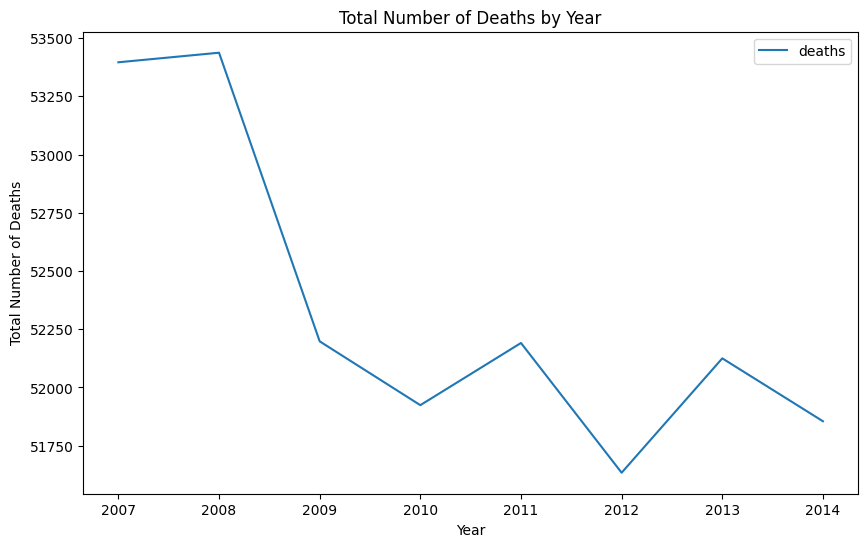

In [17]:
# Group by year and calculate the average death rate for each year
annual_death_toll = df_clean.groupby('year')['deaths'].sum().reset_index()
annual_death_toll

fig, ax = plt.subplots(figsize=(10, 6))
annual_death_toll.plot(x='year', y='deaths', ax=ax)
ax.set_title('Total Number of Deaths by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Deaths')
plt.show()


2. Causes of Death Pie Chart

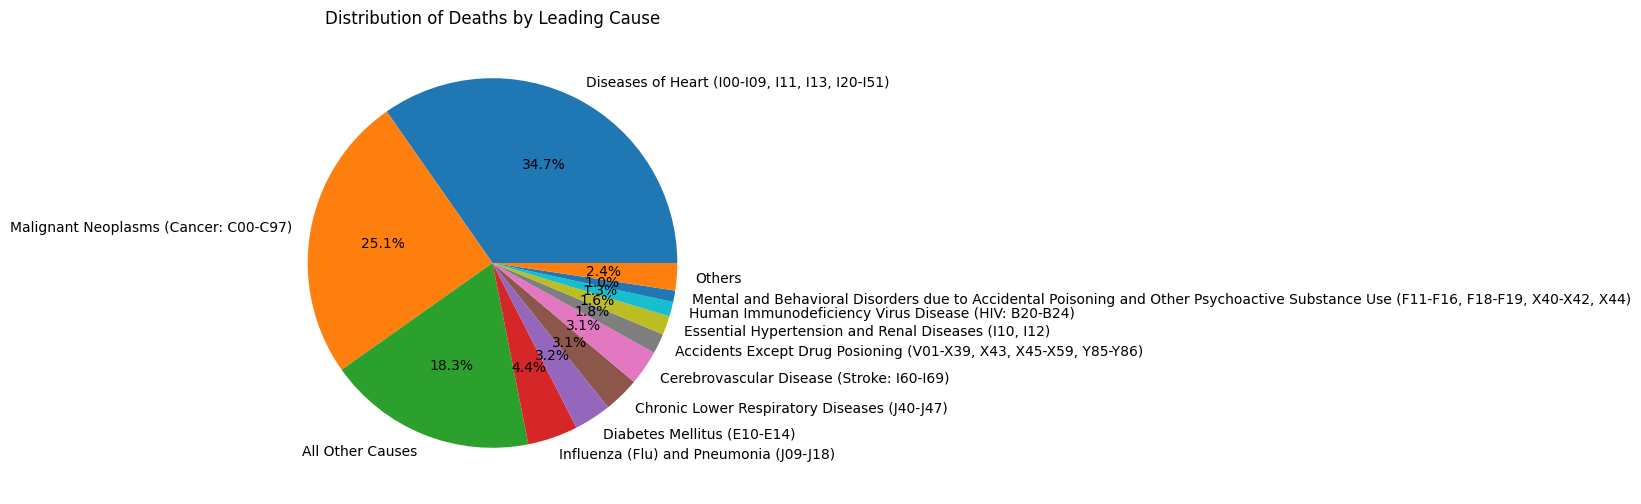

In [18]:
# Merge the least common causes of death into a single category called 'Others'
threshold = 4000
mask = df_cause['deaths'] < threshold
df_cause_merged = df_cause[~mask].copy()
df_cause_merged.loc['Others'] = ['Others', df_cause.loc[mask, 'deaths'].sum()]
# Show the percentage of deaths for each leading cause
fig, ax = plt.subplots(figsize=(10, 6))
labels = df_cause_merged['leading_cause'].tolist()
ax.pie(labels=labels, autopct='%1.1f%%',x=df_cause_merged['deaths'])
ax.set_title('Distribution of Deaths by Leading Cause')
plot = plt.show()


3. Death rates by race and gender pie chart

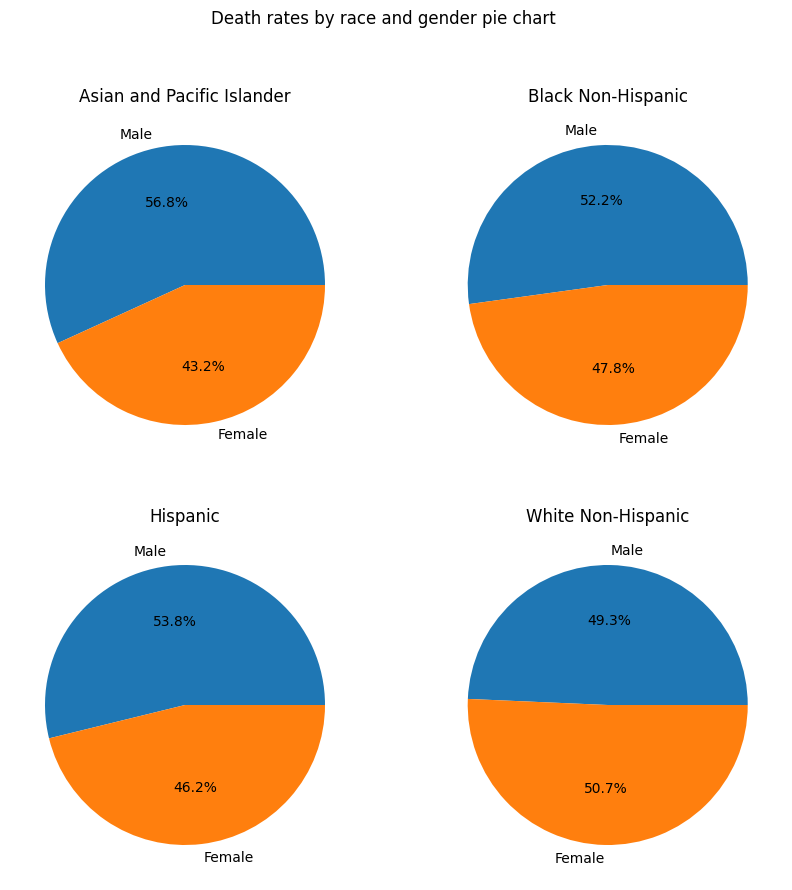

In [19]:
def sub_plot_pie_sex_race(df, ax, title):
    # Plot the pie chart
    keylist=['death_rate_male', 'death_rate_female']
    data = df[keylist]
    ax.pie(data, labels=['Male','Female'], autopct='%1.1f%%')
    ax.set_title(title)

races = df_clean['race_ethnicity'].unique().tolist()
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Death rates by race and gender pie chart')
for i, race in enumerate(races):
    sub_df = average_death_rate_by_sex_race.loc[i]
    sub_plot_pie_sex_race(sub_df, axs[i//2, i%2], sub_df['race_ethnicity'])

4. Leading causes stacked bar chart

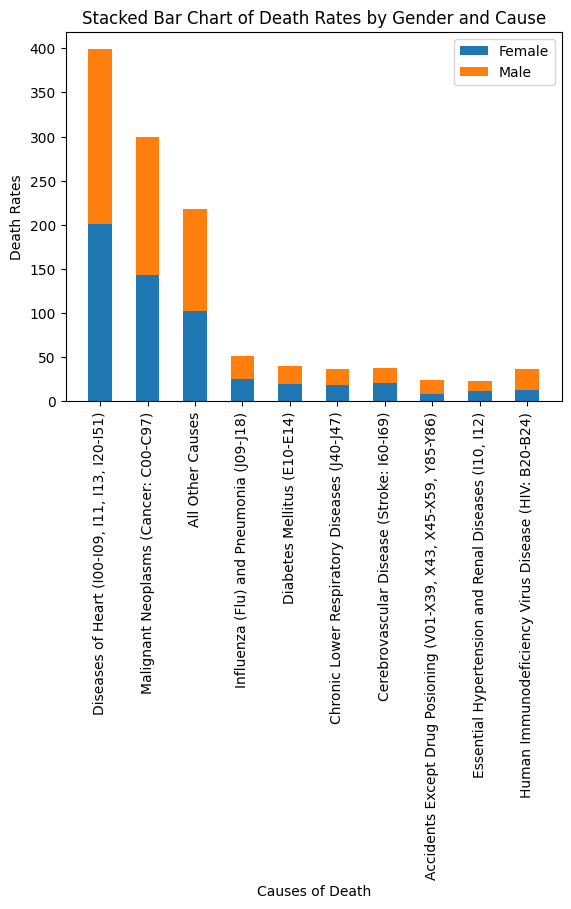

In [20]:
fig, ax = plt.subplots()
bar_width = 0.5
index = range(len(sorted_average_death_rate_by_sex_cause['cause']))

bar1 = ax.bar(index, sorted_average_death_rate_by_sex_cause['death_rate_female'], bar_width, label='Female')
bar2 = ax.bar(index, sorted_average_death_rate_by_sex_cause['death_rate_male'], bar_width, bottom=sorted_average_death_rate_by_sex_cause['death_rate_female'], label='Male')

ax.set_xlabel('Causes of Death')
ax.set_ylabel('Death Rates')
ax.set_title('Stacked Bar Chart of Death Rates by Gender and Cause')
ax.set_xticks(index)
ax.set_xticklabels(sorted_average_death_rate_by_sex_cause['cause'], rotation=90)  # 旋转标签以便阅读

ax.legend()

plt.show()

5. Total deaths by year stacked area chart

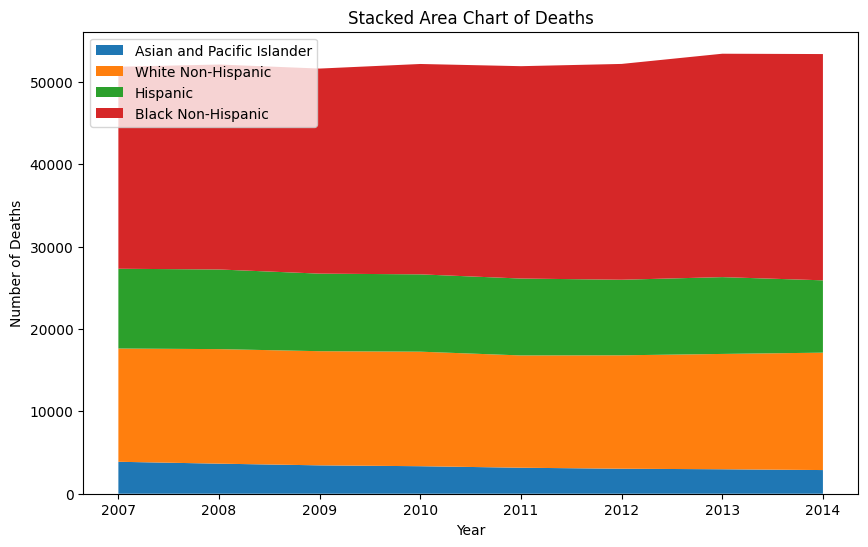

In [21]:
races = df_clean['race_ethnicity'].unique().tolist()
# unstack is used to pivot the data
death_toll_by_year_race = df_clean.groupby(['year', 'race_ethnicity'])[
    'deaths'].sum().unstack(fill_value=0)
death_toll_by_year_race = death_toll_by_year_race.reset_index()
# rename columns
death_toll_by_year_race.columns = ['year'] + races
death_toll_by_year_race

years = df_clean['year'].unique().tolist()
data = [death_toll_by_year_race[race].tolist() for race in races]
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(years, *data, labels=races)
ax.legend(loc='upper left')
ax.set_title('Stacked Area Chart of Deaths')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Deaths')
plt.show()
